In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rehamessa","key":"ae2ff69cbbe5aab2e5e74f9fc3297093"}'}

In [ ]:
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d tawsifurrahman/covid19-radiography-database

 99% 734M/745M [00:15<00:00, 60.5MB/s]
100% 745M/745M [00:15<00:00, 49.2MB/s]


In [ ]:
from zipfile import ZipFile
file_name = "/content/covid19-radiography-database.zip"
with ZipFile(file_name , 'r')as zip:
  zip.extractall()
  print('done')

done


In [ ]:
!pip install split_folders

In [ ]:
import splitfolders as sf

In [ ]:
input_folder="/content/dataset"
output="/content"

In [ ]:

sf.ratio(input_folder,output="output",seed=42,ratio=(.8,.0,.2))


Copying files: 0 files [00:00, ? files/s]
Copying files: 1 files [00:00,  5.02 files/s]
Copying files: 452 files [00:00, 1885.25 files/s]
Copying files: 925 files [00:00, 2947.25 files/s]
Copying files: 1425 files [00:00, 3661.37 files/s]
Copying files: 1925 files [00:00, 4104.75 files/s]
Copying files: 2390 files [00:00, 4280.12 files/s]
Copying files: 2864 files [00:00, 4424.54 files/s]
Copying files: 3324 files [00:00, 4027.78 files/s]
Copying files: 3745 files [00:01, 3415.54 files/s]
Copying files: 4113 files [00:01, 3196.02 files/s]
Copying files: 4456 files [00:01, 3253.86 files/s]
Copying files: 4818 files [00:01, 3347.88 files/s]
Copying files: 5213 files [00:01, 3511.97 files/s]
Copying files: 5670 files [00:01, 3806.84 files/s]
Copying files: 6116 files [00:01, 3991.94 files/s]
Copying files: 6575 files [00:01, 4162.98 files/s]
Copying files: 7017 files [00:01, 4236.51 files/s]
Copying files: 7445 files [00:02, 4170.39 files/s]
Copying files: 7866 files [00:02, 3531.06 file

In [ ]:
import keras,os
from keras.models import *
from keras.layers import *
from keras import optimizers 
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import PIL

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
trdata=ImageDataGenerator()
Train_data=trdata.flow_from_directory(directory="/content/output/train",target_size=(224,224))
tsdata=ImageDataGenerator()
test_data=tsdata.flow_from_directory(directory="/content/output/test",target_size=(224,224))

Found 11045 images belonging to 2 classes.
Found 2763 images belonging to 2 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu",input_shape=(224,224,3)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())

model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2,activation="softmax"))

In [ ]:
model.compile(optimizer="adam",loss=keras.losses.categorical_crossentropy,metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

In [ ]:
for layers in (model.layers)[:19]:
  print(layers)
  layers.trainable = False

In [ ]:
model.compile(optimizer="adam",loss=keras.losses.categorical_crossentropy,metrics=["accuracy"])

In [ ]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

checkpoint=ModelCheckpoint("vgg16_1.h5",monitor="val_accuracy",verbose=1,save_best_only=True,save_weights_only=False,mode="auto",period=1)
early=EarlyStopping(monitor="val_accuracy",min_delta=0,patience=15,verbose=1,mode="auto")
hist=model.fit_generator(steps_per_epoch=5,generator=Train_data,validation_data=test_data,validation_steps=1,epochs=50,callbacks=[checkpoint,early])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
5/5 [==============================] - 39s 465ms/step - loss: 18.4343 - accuracy: 0.4563 - val_loss: 0.8644 - val_accuracy: 0.8750

Epoch 00001: val_accuracy improved from -inf to 0.87500, saving model to vgg16_1.h5
Epoch 2/50
5/5 [==============================] - 2s 378ms/step - loss: 1.8876 - accuracy: 0.6125 - val_loss: 1.2611 - val_accuracy: 0.7500

Epoch 00002: val_accuracy did not improve from 0.87500
Epoch 3/50
5/5 [==============================] - 2s 380ms/step - loss: 0.8902 - accuracy: 0.6687 - val_loss: 2.4330 - val_accuracy: 0.5312

Epoch 00003: val_accuracy did not improve from 0.87500
Epoch 4/50
5/5 [==============================] - 2s 379ms/step - loss: 0.8568 - accuracy: 0.7875 - val_loss: 0.6836 - val_accuracy: 0.5938

Epoch 00004: val_accuracy did not improve from 0.87500
Epoch 5/50
5/5 [==============================] - 2s 383ms/step - loss: 0.6315 - accuracy: 0.6812 - val_loss: 0.4858 - val_accuracy: 0.8438

Epoch 00005: val_accuracy did not improve fr

In [ ]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

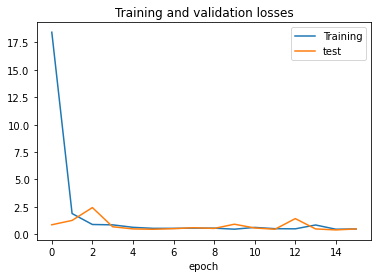

In [ ]:
hist.history.keys()
import matplotlib.pyplot as plt
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.legend(["Training","test"])
plt.title("Training and validation losses")
plt.xlabel("epoch")